In [1]:
# Here are the essential libraries that are being utilized in the code ahead
import numpy as np # For performing mathematical operations on arrays
import math # Mainly for the exponent function in math library
import matplotlib.pyplot as plt # For plotting graphs

In [2]:
# This program demonstrates the Hodgkin Huxley Model in current clamp experiments and shows action potential propagation.
#Time is in secs, voltage in mvs, conductances in m mho/mm^2, capacitance in uF/mm^2

# The given code was in Matlab. I have converted into Python

In [3]:
# Given the list vhist containing the Voltage values at different times, find the number of peaks
# To find a peak there are 2 conditions that need to be satisfied:
# a) Firstly, the voltage potential should be greater than the threshold potential
# b) Also, for it to be "peak", the value of potential should be greater than its neighbouring values

def find_peaks(v_hist):
    # Threshold voltage is assumed.
    threshold_v = 10
    # Counts the number of spikes observed.
    count = 0
    for i in range(1,len(v_hist)-1):
        # Condition (a)
        if(v_hist[i] >= threshold_v):
            # Condition (b)
            if((v_hist[i] > v_hist[i+1]) and (v_hist[i] > v_hist[i-1])):
                count += 1
    # Return the number of spikes observed.
    return count

In [4]:
# If given a list of the number of peaks (quantitatively the firing rate of neuron), find the threshold value of currents.
# There are three threshold values for externally applied currents:
# a) I1 marks the transition between no AP and finite AP's
# b) I2 marks the transition between finite AP's and Limit Cycle continuous firing
# c) I3 marks the transition between continuous firing and distortion leading to no APs

def find_current(num_peaks):
    # Intializing the threshold currents to zero.
    I1 = 0
    I2 = 0
    I3 = 0
    for i in range(1,len(num_peaks)-1):
        # Condition (a)
        if(num_peaks[i] > 0 and num_peaks[i-1] ==0):
            I1 = i
        # Condition (b)
        if(num_peaks[i+1] - num_peaks[i] > 4):
            I2 = i
        # Condtion (c)
        if(num_peaks[i] - num_peaks[i+1] > 3):
            I3 = i
    # Return all the three threshold currents.
    return I1, I2, I3

Enter the value of the impulse current in microamperes: 0.023
Current:  0.023


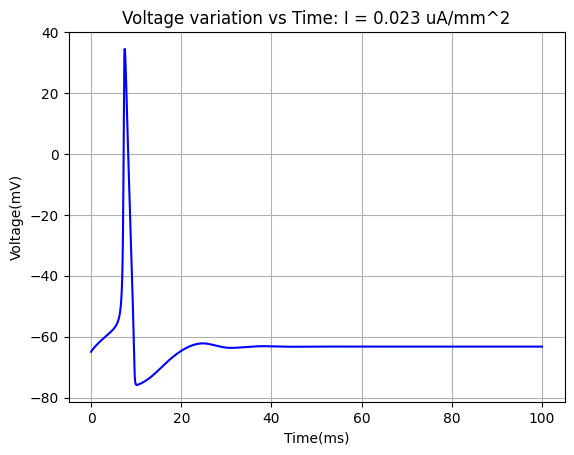

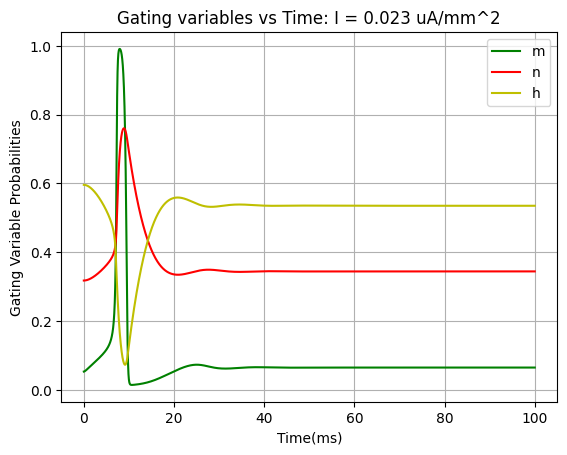

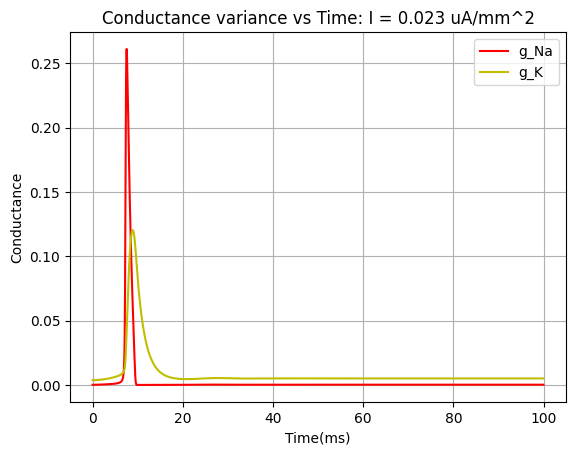

In [8]:
# Take the current input from the user.
current = float(input("Enter the value of the impulse current in microamperes: "))
# Declare all the constant values that are required for the evaluation purpose.
gkmax = 0.36
vk = -77
gnamax = 1.20
vna = 50
gl = 0.003
vl = -54.387
cm = 0.01
dt = 0.01

# For evaluation sake, number of iterations is taken as 1000.
# For calculating the firing rate, number of iterations is taken much higher, 100000, to get a more precise graph.
niter = 10000

# Making the time list over which we will be iterating.
t = [x*dt for x in range(0,niter)]

# Initializing the values for voltage, probabilitites of m gate, h gate, n gate.
v = -64.9964
m = 0.0530
h = 0.5960
n = 0.3177

# Making lists to store the values of "gna", "gk", "v", "m", "n" and "h" with changes in time.
gnahist = [0 for x in range(niter)]
gkhist = [0 for x in range(niter)]
vhist = [0 for x in range(niter)]
mhist = [0 for x in range(niter)]
hhist = [0 for x in range(niter)]
nhist = [0 for x in range(niter)]

# Described below is the working of Hodgkin Huxley model, as given in the code itself as per the derived equations.
iapp = current * np.ones((1,niter))
iapp = [current * 1 for x in range(niter)]
for i in range(0,niter):
    gna = gnamax * m**3 * h
    gk = gkmax * n**4
    gtot = gna + gk + gl
    vinf = ((gna * vna + gk * vk + gl * vl) + iapp[i]) / gtot
    tauv = cm / gtot
    v = vinf + (v - vinf) * math.exp(-dt / tauv)
    alpham = 0.1 * (v + 40) / (1 - math.exp(-(v + 40) / 10))
    betam = 4 * math.exp(-0.0556 * (v + 65))
    alphan = 0.01 * (v + 55) / (1 - math.exp(-(v + 55) / 10))
    betan = 0.125 * math.exp(-(v + 65) / 80)
    alphah = 0.07 * math.exp(-0.05 * (v + 65))
    betah = 1 / (1 + math.exp(-0.1 * (v + 35)))
    taum = 1 / (alpham + betam)
    tauh = 1 / (alphah + betah)
    taun = 1 / (alphan + betan)
    minf = alpham * taum
    hinf = alphah * tauh
    ninf = alphan * taun
    m = minf + (m - minf) * math.exp(-dt / taum)
    h = hinf + (h - hinf) * math.exp(-dt / tauh)
    n = ninf + (n - ninf) * math.exp(-dt / taun)
    vhist[i] = v
    mhist[i] = m
    hhist[i] = h
    nhist[i] = n

gna = []
gk = []
for i in range(len(mhist)):
    gna.append(gnamax * (mhist[i] ** 3) * hhist[i])
    gk.append(gkmax * (nhist[i] ** 4))

# Plot the graph of Voltage variation with time.
print("Current: ", current)
plt.plot(t, vhist, color='b', label='Voltage')
plt.xlabel('Time(ms)')
plt.ylabel('Voltage(mV)')
plt.title('Voltage variation vs Time: I = {} uA/mm^2'.format(current))
plt.grid()
plt.show()

# Plot the graph for Gating variables probabilities with time.
plt.plot(t, mhist, color='g', label='m')
plt.plot(t, nhist, color='r', label='n')
plt.plot(t, hhist, color='y', label='h')
plt.xlabel('Time(ms)')
plt.ylabel('Gating Variable Probabilities')
plt.title('Gating variables vs Time: I = {} uA/mm^2'.format(current))
plt.legend()
plt.grid()
plt.show()

# Plot the graph for conductance with time.
plt.plot(t, gna, color='r', label='g_Na')
plt.plot(t, gk, color='y', label='g_K')
plt.xlabel('Time(ms)')
plt.ylabel('Conductance')
plt.title('Conductance variance vs Time: I = {} uA/mm^2'.format(current))
plt.legend()
plt.grid()
plt.show()